<a href="https://www.kaggle.com/code/devanggiri/ml-data-preprocessing-analysis-pipeline?scriptVersionId=157128831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
import numpy as np  # Correct import for mean and median
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, names=names)


In [3]:
# Check the data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
# Splitting of the dataset into Training, Validation, and Test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)


In [5]:
# Separate independent features and target variables
X_train, y_train = train_df.drop('class', axis=1), train_df['class']
X_val, y_val = val_df.drop('class', axis=1), val_df['class']
X_test, y_test = test_df.drop('class', axis=1), test_df['class']


In [6]:
# Count the missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


In [7]:
# Dealing with missing values using SimpleImputer method
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)


In [8]:
# Show the categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("Categorical Features:\n", categorical_features)


Categorical Features:
 Index(['class'], dtype='object')


In [9]:
# Convert categorical features into integers using Label Encoder and One Hot Encoder
label_encoder = LabelEncoder()
X_train_encoded = X_train_imputed.copy()
X_val_encoded = X_val_imputed.copy()
X_test_encoded = X_test_imputed.copy()


# Exclude "class" from categorical features
categorical_features = [feature for feature in categorical_features if feature != 'class']

for feature in categorical_features:
    X_val_encoded[feature] = label_encoder.transform(X_val_imputed[feature])
    X_test_encoded[feature] = label_encoder.transform(X_test_imputed[feature])

# One-hot encoding
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
X_train_encoded_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(X_train_encoded[categorical_features]))
X_val_encoded_one_hot = pd.DataFrame(one_hot_encoder.transform(X_val_encoded[categorical_features]))
X_test_encoded_one_hot = pd.DataFrame(one_hot_encoder.transform(X_test_encoded[categorical_features]))


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


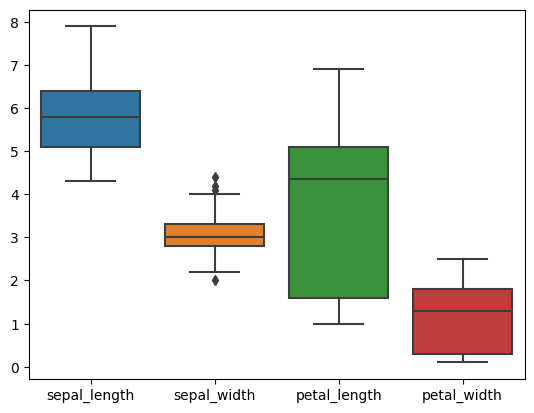

In [10]:
# Check for outliers
sns.boxplot(data=df.drop('class', axis=1))
plt.show()

In [11]:
# Drop outliers with explicit DataFrame alignment
numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]
Q1, Q3 = df_numeric.quantile(0.25), df_numeric.quantile(0.75)

IQR = Q3 - Q1
df_no_outliers = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]


In [12]:
# Normalization or Standardization of the dataset
min_max_scaler = MinMaxScaler()
z_score_scaler = StandardScaler()

X_train_scaled_min_max = pd.DataFrame(min_max_scaler.fit_transform(X_train_imputed), columns=X_train.columns)
X_train_scaled_z_score = pd.DataFrame(z_score_scaler.fit_transform(X_train_imputed), columns=X_train.columns)


In [13]:
# Statistical Analysis on Numeric Columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

print("Statistical Analysis:")
print("Mean:\n", df[numeric_columns].mean())
print("Median:\n", df[numeric_columns].median())
print("Variance:\n", df[numeric_columns].var())
print("Standard Deviation:\n", df[numeric_columns].std())


Statistical Analysis:
Mean:
 sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64
Median:
 sepal_length    5.80
sepal_width     3.00
petal_length    4.35
petal_width     1.30
dtype: float64
Variance:
 sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
dtype: float64
Standard Deviation:
 sepal_length    0.828066
sepal_width     0.433594
petal_length    1.764420
petal_width     0.763161
dtype: float64


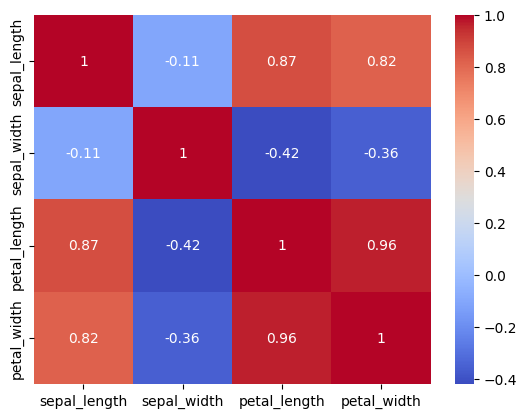

In [14]:
# Correlation Analysis on Numeric Columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

# Handle missing values (replace NaN with the mean or other appropriate strategy)
numeric_df = numeric_df.fillna(numeric_df.mean())

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
